In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mt 

In [6]:
url = "http://bit.ly/w-data"
print("Reading data from remote link")


Reading data from remote link


In [7]:
student_data = pd.read_csv(url)
print("Data imported successfully")
student_data.head(25)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


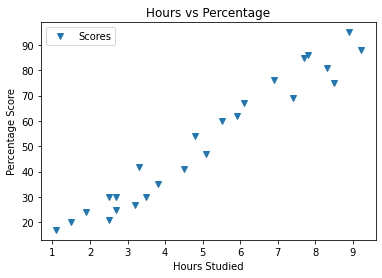

Plotting the distribution of scores


In [14]:
student_data.plot(x='Hours', y='Scores', style='v')  
mt.title('Hours vs Percentage')  
mt.xlabel('Hours Studied')  
mt.ylabel('Percentage Score')  
mt.show()
print("Plotting the distribution of scores")


In [17]:
x = student_data.iloc[:, :-1].values
y = student_data.iloc[:, 1].values

In [18]:
# split the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train ,x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 0)

In [19]:
x_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [20]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [21]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [22]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [25]:
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train) 

print("Training complete.")

Training complete.


In [27]:
# Make predictions using the testing set
student_y_pred = regr.predict(x_test)
student_y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

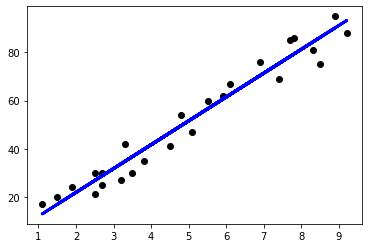

In [33]:
# Plotting the regression line
line = regr.coef_*x+regr.intercept_

# Plotting for the test data
mt.scatter(x, y, color="black")
mt.plot(x, line, color="blue", linewidth=3);
mt.show()

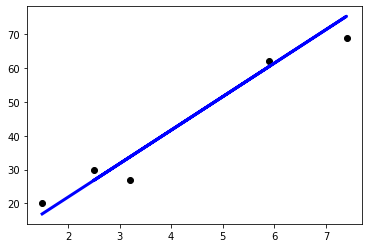

In [29]:
# Plotting for the predicted test data
mt.scatter(x_test, y_test, color="black")
mt.plot(x_test, student_y_pred, color="blue", linewidth=3)
mt.show()

In [35]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': student_y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [37]:
# test with own data
hours = (9.25)
self_pred = regr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(self_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


In [41]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, student_y_pred)) 
print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, student_y_pred))


Mean Absolute Error: 4.183859899002975
Mean squared error: 21.60
